### Multi-class Classifcation - one label per instace

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression


In [51]:
df = pd.read_csv("sim_golf_scores_for_ml.csv")
df.head(3)

,player_name,player_handicap,course_name,hole_timestamp,hole_yardage,hole_par,player_score,hole_number
0,Bad_player,high,Local Course,13.365176,495,5,6,1
1,Bad_player,high,Local Course,23.197532,271,4,5,2
2,Bad_player,high,Local Course,33.258234,432,4,6,3


## Predicting the Label of EACH HOLE

In [52]:


grouped_stats = df.groupby('player_handicap')[['player_score']].describe()
print(grouped_stats)

grouped_stats = df.groupby(['player_handicap', 'hole_par'])[['player_score']].describe()
grouped_stats

                player_score                                             
                       count      mean       std  min  25%  50%  75%  max
player_handicap                                                          
high                 36000.0  5.340083  0.984072  3.0  5.0  5.0  6.0  9.0
low                  36000.0  3.829111  0.660495  3.0  3.0  4.0  4.0  6.0
mid                  36000.0  4.699361  0.786727  3.0  4.0  5.0  5.0  7.0


player_score                                          \
                                count      mean       std  min  25%  50%  75%   
player_handicap hole_par                                                        
high            3             11600.0  4.286552  0.454642  3.0  4.0  4.0  5.0   
                4             19200.0  5.566146  0.524020  4.0  5.0  6.0  6.0   
                5              5200.0  6.855577  0.517540  6.0  7.0  7.0  7.0   
low             3             11600.0  3.013276  0.114458  3.0  3.0  3.0  3.0   
                4             19200.0  4.005156  0.071624  4.0  4.0  4.0  4.0   
                5              5200.0  4.999038  0.063548  4.0  5.0  5.0  5.0   
mid             3             11600.0  3.833621  0.375893  3.0  4.0  4.0  4.0   
                4             19200.0  4.886406  0.363961  4.0  5.0  5.0  5.0   
                5              5200.0  5.940000  0.374531  5.0  6.0  6.0  6.0   

                               
                          max  
player_handicap hole_par       
high            3         6.0  
                4         7.0  
                5         9.0  
low             3         4.0  
                4         5.0  
                5         6.0  
mid             3         5.0  
                4         6.0  
                5         7.0

In [53]:
# Split into Training & Testing
X = df[['course_name','hole_yardage','hole_par', 'player_score']].copy()
y = df[['player_handicap']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_to_analyze = X_test.copy()


In [ ]:
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['course_name'])
])

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(multi_class='ovr')),
    # ('classifier', RandomForestClassifier())
])

In [65]:
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)

X_test_to_analyze['predictions'] = predictions
X_test_to_analyze['actual'] = y_test
print(X_test_to_analyze['predictions'].value_counts())
# from sklearn.metrics import accuracy_score
print('Accuracy Score: ', round(accuracy_score(y_test, predictions),2))

c:\Users\matt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


low     10884
mid      6449
high     4267
Name: predictions, dtype: int64
Accuracy Score:  0.32


              precision    recall  f1-score   support

        high       0.32      0.19      0.24      7239
         low       0.33      0.50      0.39      7130
         mid       0.32      0.28      0.30      7231

    accuracy                           0.32     21600
   macro avg       0.32      0.32      0.31     21600
weighted avg       0.32      0.32      0.31     21600

[[1377 3618 2244]
 [1424 3540 2166]
 [1466 3726 2039]]


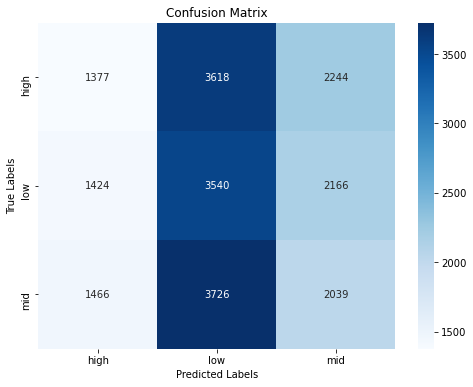

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Classification Report
print(classification_report(y_test, predictions))

# Confusion Matrix

# Assuming y_test are the true labels and y_pred are the predicted labels
cm = confusion_matrix(y_test, predictions)
print(cm)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['high', 'low', 'mid'], yticklabels=['high', 'low', 'mid'])

# Add labels, title, and show the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## NEED TO STUDY METRICS FOR MULTI-CLASS PREDICTIONS

In [ ]:
predictions['']

array(['low', 'low', 'low', ..., 'mid', 'low', 'mid'], dtype=object)

In [57]:
print(X_test_to_analyze['predictions'].value_counts())
print(X_test_to_analyze['actual'].value_counts())

low     10884
mid      6449
high     4267
Name: predictions, dtype: int64
high    7239
mid     7231
low     7130
Name: actual, dtype: int64


## Predicting the label (Handicap) based on full rounds
### need to agg 